In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

# Prepare dataset

In [3]:
ds_buy = np.load('data/dataset/train_2022-06-01_2023-05-31_260d/buy_patterns.npy')

In [4]:
ds_buy.shape

(374, 60, 5)

<Axes: >

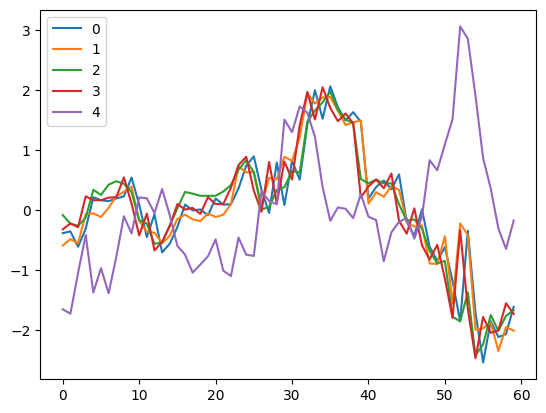

In [5]:
df = pd.DataFrame(ds_buy[1])
mean = ds_buy[1].mean(axis=0)
std = ds_buy[1].std(axis=0)
df = pd.DataFrame((ds_buy[1]-mean)/std)
df.plot()

In [6]:
X = df.values
adj_matrices = [np.matmul(X[:, i:i+1], 
                             X[:, i:i+1].T)
                for i in range(X.shape[1])]

A = np.stack(adj_matrices)

In [7]:
A.shape

(5, 60, 60)

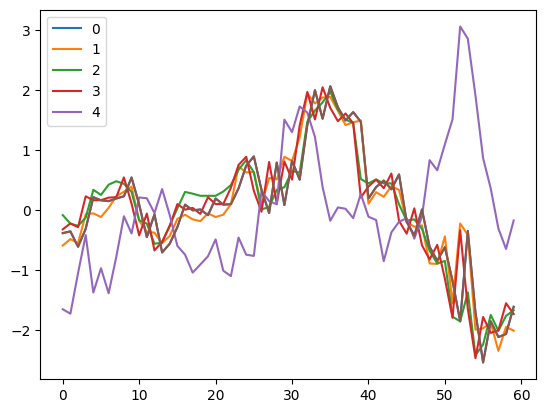

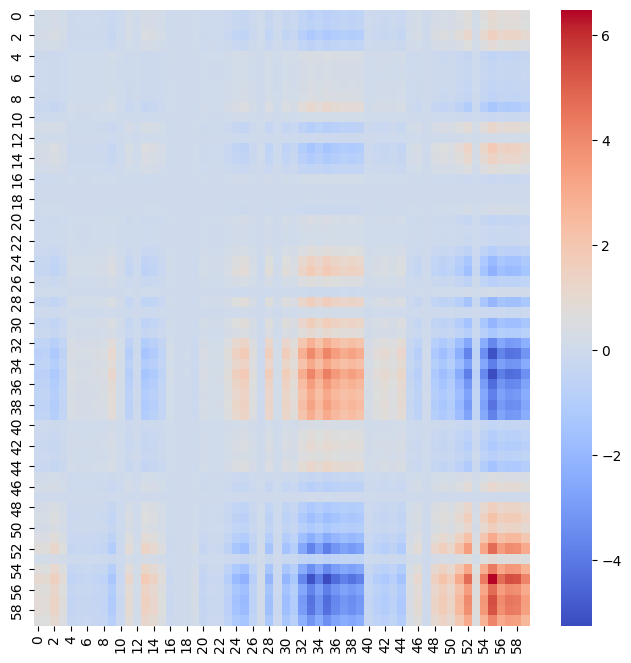

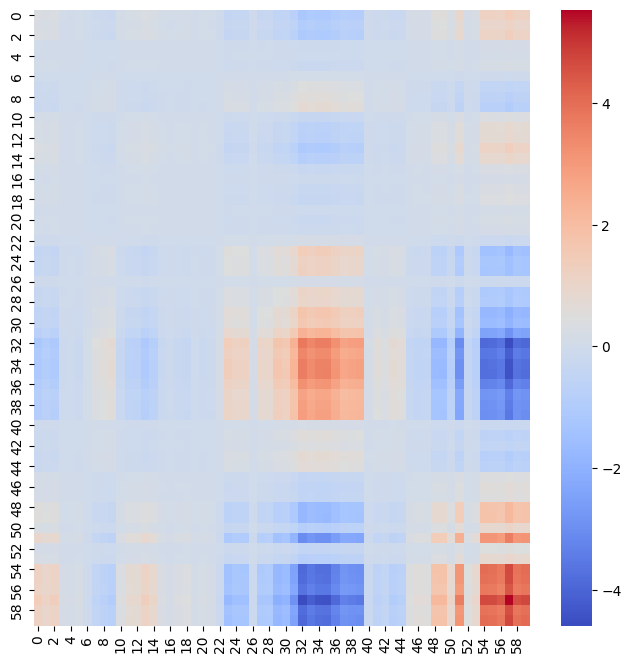

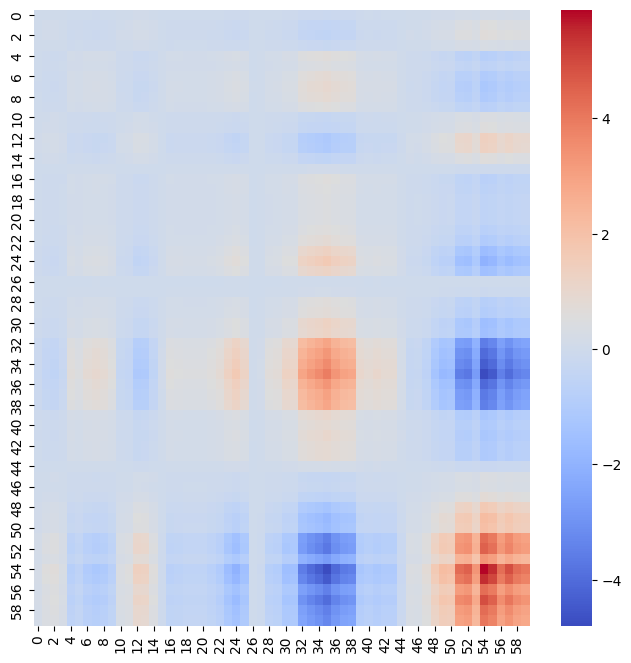

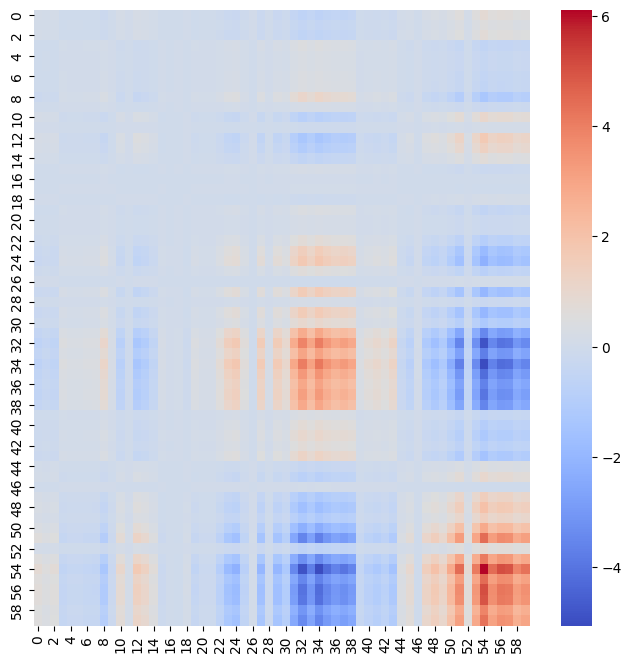

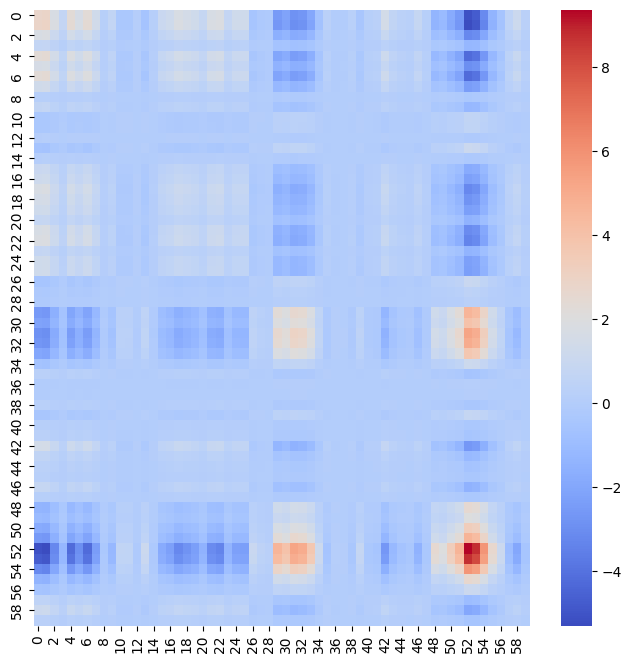

In [8]:
df.plot()
df[0].plot()

for i in range(0, 5):
    plt.figure(figsize=(8, 8))
    a = A[i, :, :]
    sns.heatmap(a, annot=False, cmap="coolwarm", fmt="g")
    plt.show()

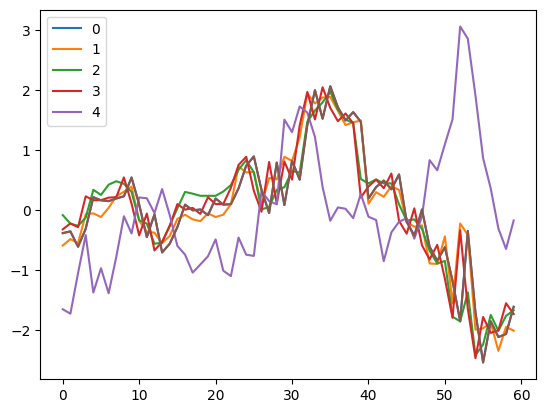

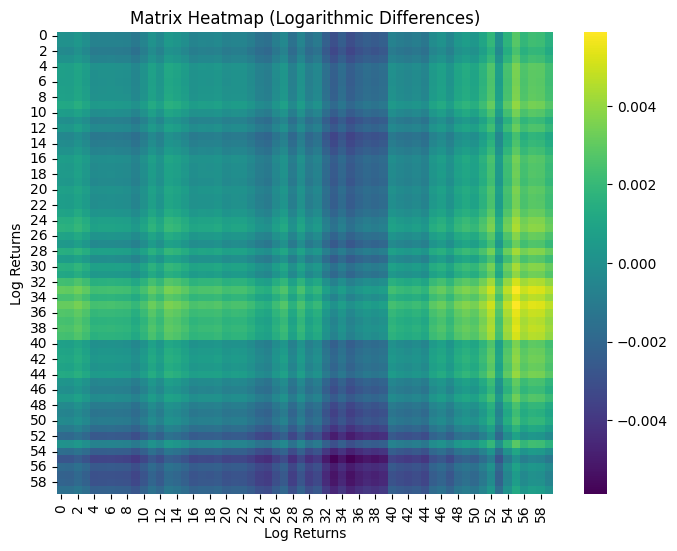

In [9]:
df.plot()
df[0].plot()


def pairwise_log_diff_matrix(x):
    log_x = np.log(x)
    log_diff_matrix = log_x[:, None] - log_x[None, :]
    return log_diff_matrix

def extract_edges_with_lag(matrix, max_lag=15):
    n = matrix.shape[0]
    edges = []
    for i in range(n):
        for j in range(i + 1, min(i + max_lag + 1, n)):
            edges.append((i, j, matrix[i, j]))
    return edges

    
def process_layer(x):
    log_diff_matrix = pairwise_log_diff_matrix(x)
    edges_with_lag = extract_edges_with_lag(log_diff_matrix)
    return edges_with_lag

    
def process_layers(data_):
    layers = []
    for col in range(data_.shape[1]):
        layers.append(process_layer(data[i]))
    return layers


x = torch.tensor(ds_buy[1,:,0])
log_diff_matrix = pairwise_log_diff_matrix(x)
# edges_with_lag = extract_edges_with_lag(log_diff_matrix)
# print(len(edges_with_lag))
plt.figure(figsize=(8, 6))
sns.heatmap(log_diff_matrix, annot=False, cmap='viridis', cbar=True)
plt.title('Matrix Heatmap (Logarithmic Differences)')
plt.xlabel('Log Returns')
plt.ylabel('Log Returns')
plt.show()

In [10]:
A_ = np.zeros_like(log_diff_matrix)
rows, cols = log_diff_matrix.shape

for i in range(rows):
    for j in range(cols):
        if abs(i - j) <= 4:
            A_[i, j] = log_diff_matrix[i, j]

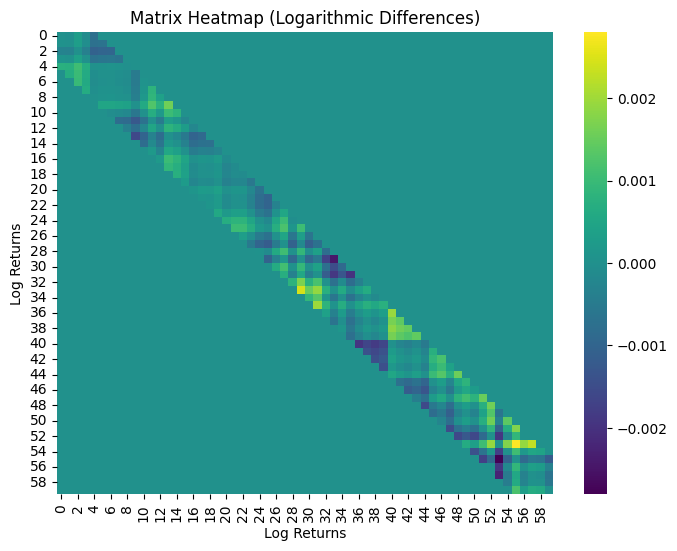

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(A_, annot=False, cmap='viridis', cbar=True)
plt.title('Matrix Heatmap (Logarithmic Differences)')
plt.xlabel('Log Returns')
plt.ylabel('Log Returns')
plt.show()